In [6]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [7]:
# load cifar10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

In [9]:
datagen_train = ImageDataGenerator(zca_whitening=True)
datagen_test = ImageDataGenerator(zca_whitening=True)

datagen_train.fit(X_train)
datagen_test.fit(X_test)

/Users/raphael/fun/dropout/.venv/lib/python3.9/site-packages/keras/src/legacy/preprocessing/image.py:1047: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [10]:
X_train_zca = []
X_test_zca = []

for x_batch, _ in datagen_train.flow(X_train, y_train, batch_size=128, shuffle=False):
    X_train_zca.append(x_batch)
    if len(X_train_zca) * 128 >= len(X_train):
        break

In [11]:
X_zca = np.concatenate(X_train_zca, axis=0)[:len(X_train)]

In [12]:
import torch

# Convert to PyTorch format: (N, C, H, W)
X_zca_torch = torch.from_numpy(X_zca).permute(0, 3, 1, 2).float()
y_train_torch = torch.from_numpy(y_train.squeeze()).long()

In [18]:
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

dataset = TensorDataset(X_zca_torch, y_train_torch)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.9730148..3.4366145].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-12.969965..13.499666].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.600208..4.475712].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9.971308..14.504671].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.097845..9.683309].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-10.362147..7.476272].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.3164537..4.0

torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])


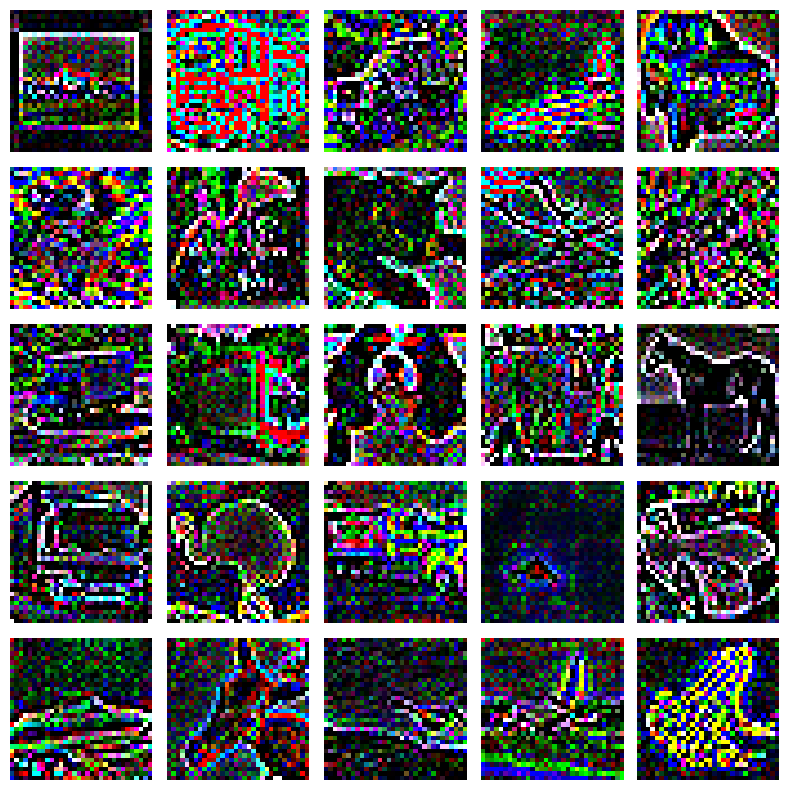

In [19]:
N = 5               # N^2 images
fig, ax = plt.subplots(nrows=N, ncols=N,figsize=(8,8))

ax = ax.flatten()   # make indexing easier
for i, (image, label) in enumerate(loader):
    print(image.shape) 
    if i == N*N: break
    image = image.squeeze().permute(1, 2, 0).numpy() # [1, 3, 32, 32] -> [3, 32, 32] -> [32, 32, 3]

    ax[i].imshow(image)
    ax[i].axis('off')

plt.tight_layout()
plt.show()